## Analysis of Horror Movies
This notebook analyzes the trends and box office success of horror movies over the years. We will explore the data to understand the rise of horror films and identify the top-grossing entries per decade."

In [47]:
#for data wrangling
import pandas as pd
import numpy as np
#for plotting 
from plotnine import *
#to add different fonts
import matplotlib.font_manager
import datetime

In [48]:
# Get the list of system fonts available on the machine
flist = matplotlib.font_manager.findSystemFonts()

# Convert the list of fonts to a single string and make it lowercase
flist = ''.join(flist).lower()

# Check if the font 'Corbel' is available in the system fonts
if 'corbel' in flist:
    body_font = 'corbel'  # If 'Corbel' is found, set it as the body font
else:
    body_font = 'sans'  # If 'Corbel' is not found, default to 'sans'


In [49]:
# Read the data
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-11-01/horror_movies.csv")

In [50]:
# Glimpse of the data
df.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


In [51]:
# Filter only English movies
english = df[df['original_language'] ==  "en"]

In [52]:
english.shape

(21923, 20)

In [53]:

# Ensure 'english' is a copy of the DataFrame to avoid setting on a slice
english = english.copy()

# Convert release_date to datetime
english['date'] = pd.to_datetime(english['release_date'])

# Create new columns for year, month, and day
english['year'] = english['date'].dt.year
english['month'] = english['date'].dt.month
english['day'] = english['date'].dt.day



In [54]:
# Create a function to get the decade
def get_decade(year):
    return (year // 10) * 10

# Add a decade column
english['decade'] = english['year'].apply(get_decade)

# Filter for years 1950-2022
filtered_english = english[(english['year'] >= 1950) & (english['year'] <= 2022)]

# Group by decade and get the highest grossing movie
highest_grossing = filtered_english.groupby('decade').apply(lambda x: x.nlargest(1, 'revenue')).reset_index(drop=True)

# Round revenue to millions
highest_grossing['revenue_millions'] = (highest_grossing['revenue'] / 1000000).round(0)

# Select and order relevant columns
result = highest_grossing[['decade', 'title', 'year', 'revenue_millions']].sort_values('decade')
result

<positron-console-cell-54>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


,decade,title,year,revenue_millions
0,1950,House of Wax,1953,24.0
1,1960,Psycho,1960,50.0
2,1970,Jaws,1975,471.0
3,1980,Gremlins,1984,153.0
4,1990,The Blair Witch Project,1999,249.0
5,2000,Van Helsing,2004,300.0
6,2010,It,2017,702.0
7,2020,A Quiet Place Part II,2021,297.0


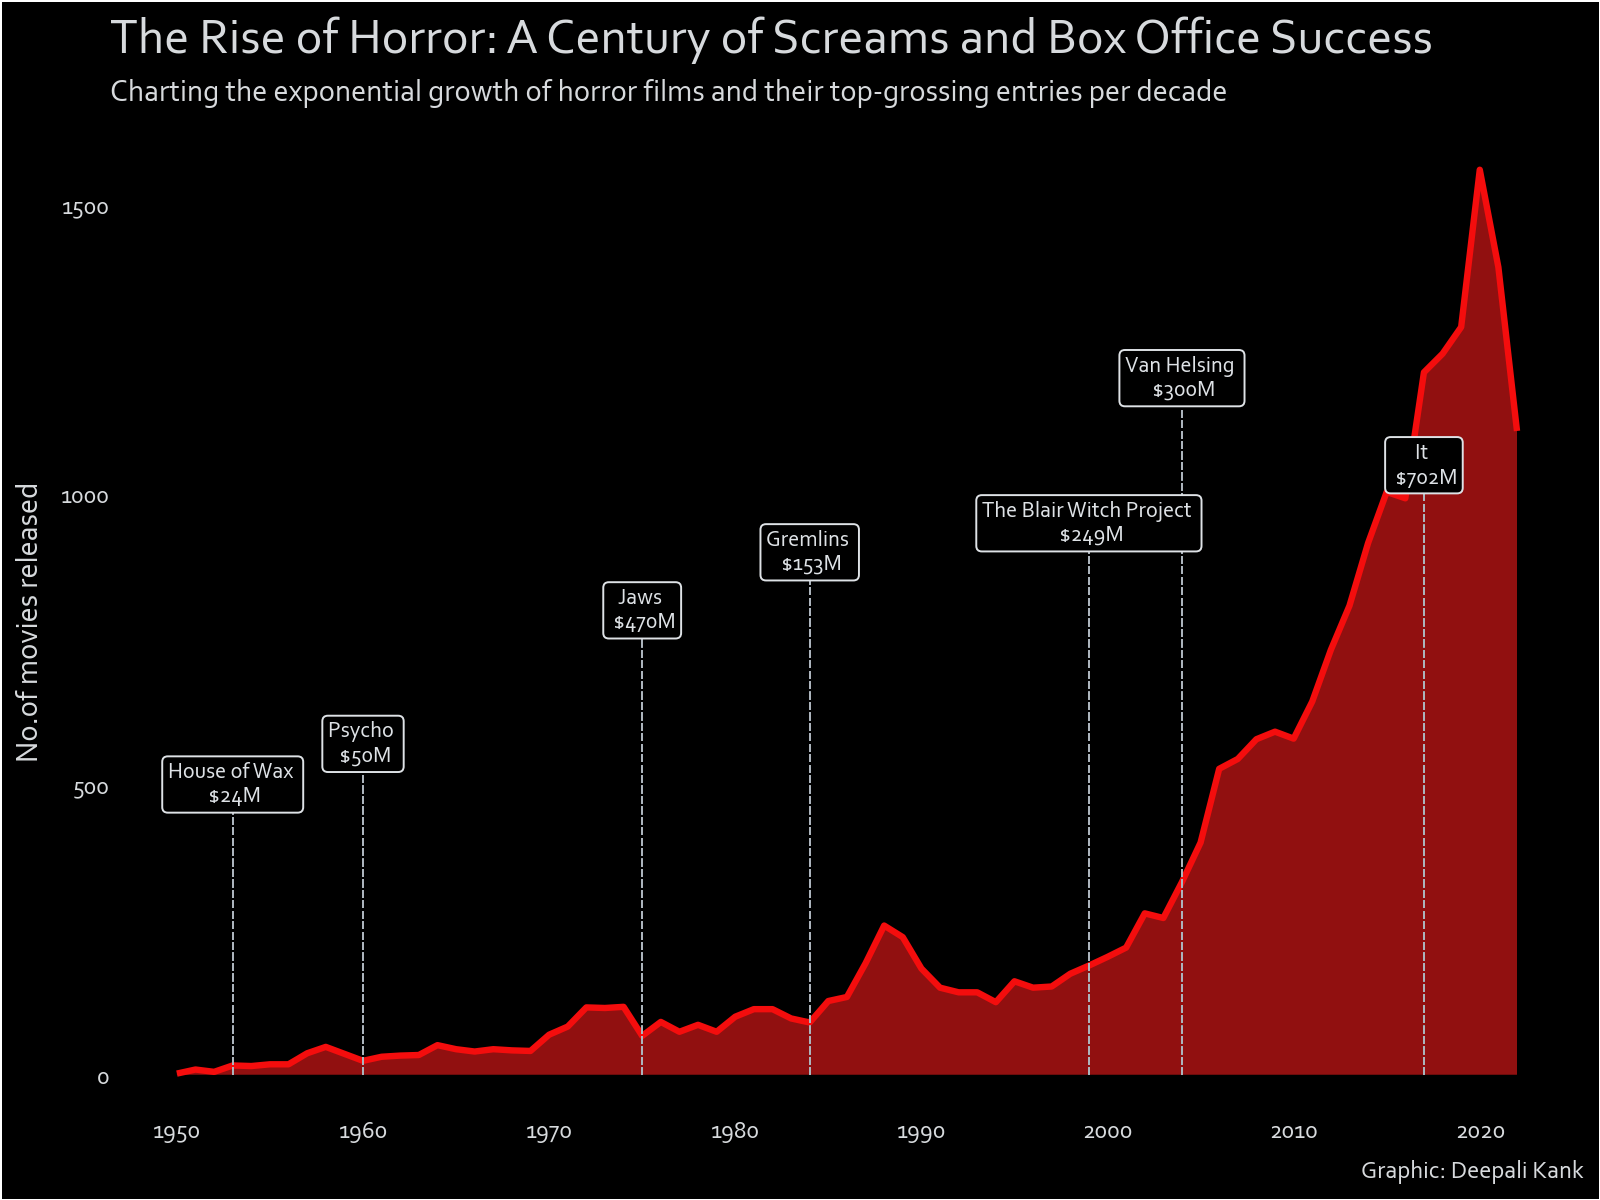

In [56]:
# Count the number of movies released each year and reset the index
df1 = english['year'].value_counts()
df1 = df1.reset_index()
df1.columns = ['year', 'count']

# Create a plot with plotnine

(
    ggplot(df1,aes('year', 'count')) + 
    geom_area(fill='#911010') + 
    geom_line(color = '#f40d0d', size = 1.3) +
    scale_x_continuous(breaks=range(1950, 2022, 10)) +

    # Add vertical dashed lines for significant years with top-grossing horror movies
    geom_segment(aes(x = 1953, xend = 1953, y = 0, yend = 500),color = "#adb5bd", linetype = "dashed", size = 0.4) +
    geom_segment(aes(x = 1960, xend = 1960, y = 0, yend = 570),color = "#adb5bd", linetype = "dashed", size = 0.4)+
    geom_segment(aes(x = 1975, xend = 1975, y = 0, yend = 800), color = "#adb5bd", linetype = "dashed", size = 0.4) +
    geom_segment(aes(x = 1984, xend = 1984, y = 0, yend = 900), color = "#adb5bd", linetype = "dashed", size = 0.4) +
    geom_segment(aes(x = 1999, xend = 1999, y = 0, yend = 950), color = "#adb5bd", linetype = "dashed", size = 0.4) +
    geom_segment(aes(x = 2004, xend = 2004, y = 0, yend = 1200), color = "#adb5bd", linetype = "dashed", size = 0.4) +
    geom_segment(aes(x = 2017, xend = 2017, y = 0, yend = 1050), color = "#adb5bd", linetype = "dashed", size = 0.4)+
    annotate(geom="label", fill="black", color="#dee2e6", label = "House of Wax \n $24M", y=500, x=1953, size = 8)  + 

    # Add labels for the top-grossing movies of each significant year

    annotate(geom="label", fill="black", color="#dee2e6", label = "Psycho \n $50M", y=570, x=1960, size = 8)+  
    annotate(geom="label", fill="black", color="#dee2e6", label = "Jaws \n $470M", y=800, x=1975, size = 8) +   
    annotate(geom="label", fill="black", color="#dee2e6", label = "Gremlins \n $153M", y=900, x=1984, size = 8) +
    annotate(geom="label", fill="black", color="#dee2e6", label = "The Blair Witch Project \n $249M", y=950, x=1999, size = 8)+
    annotate(geom="label", fill="black", color="#dee2e6", label = "Van Helsing \n $300M", y=1200, x=2004, size = 8)+
    annotate(geom="label", fill="black", color="#dee2e6", label = "It \n $702M", y=1050, x=2017, size = 8)+

    # Add labels and titles to the plot

    labs(x="", y="No.of movies released", title="The Rise of Horror: A Century of Screams and Box Office Success", subtitle = "Charting the exponential growth of horror films and their top-grossing entries per decade", caption = "Graphic: Deepali Kank") + 

    # Customize the plot theme
    
    theme(figure_size=[8,6],
       panel_background=element_rect(fill="black"),
       plot_background = element_rect(fill="black"),
       plot_title = element_text(size=18,family=body_font),
       text = element_text(color="#d7dadd", family=body_font),
       panel_grid = element_blank(),
       panel_grid_major_x = element_blank(),
       axis_ticks = element_blank(),
      )
)